# PNEC PCHA

In [1]:
import pandas as pd
from py_pcha import PCHA
import magic
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('../../data/single-cell-rna-seq/PNECs/krasnow_scRNAseq_normal_lung.csv', index_col = 0)

In [4]:
data = np.log1p(data).T

In [5]:
data

,LOC100040786,MAGEB2,GM8579,VMN2R94,OTTMUSG00000016609,ARFGAP3,GM19461,CETN4,SLFN8,SLFN8,...,E2F6,SH3KBP1,SH3KBP1,CD40,ADAM17,MIR204,MIR1192,MIR31,MIR155,ZSGREEN
A4_C49_022114_S5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2.620311,...,0.0,0.0,0.0,0.0,2.524928,0.0,0.0,0.0,0.0,7.805116
A6_C51_022114_S3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.662688,0.0,0.0,0.0,0.0,8.457263
E9_C30_022114_S1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,8.156479
A9_C04_021715_IL6202_N701_N503_S4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500775,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,9.523793
C9_C16_021715_IL6202_N702_N501_S1,0.0,0.0,0.0,0.0,0.0,5.175189,0.0,0.000000,0.0,2.571084,...,0.0,0.0,0.0,0.0,0.593327,0.0,0.0,0.0,0.0,8.448186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F9_C36_012015_IL6205_N706_N505_S45,0.0,0.0,0.0,0.0,0.0,5.623945,0.0,5.428424,0.0,1.627278,...,0.0,0.0,0.0,0.0,0.207014,0.0,0.0,0.0,0.0,3.001714
G10_C90_012015_IL6205_N706_N508_S50,0.0,0.0,0.0,0.0,0.0,4.219655,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,3.699077,0.0,0.0,0.0,0.0,0.000000
G9_C42_012015_IL6205_N706_N507_S48,0.0,0.0,0.0,0.0,0.0,2.897568,0.0,3.685122,0.0,2.154085,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
H1_C43_012015_IL6205_N707_N501_S40,0.0,0.0,0.0,0.0,0.0,3.124565,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,2.124654,0.0,0.0,0.0,0.0,3.246880


In [14]:
data = data.groupby(data.columns, axis=1).mean()

In [15]:
# import pandas as pd
magic_operator = magic.MAGIC(solver='approximate')
X_magic = magic_operator.fit_transform(data)

Calculating MAGIC...
  Running MAGIC on 225 cells and 24173 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/magic/magic.py:426: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


    Calculated PCA in 0.66 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.69 seconds.
  Calculating imputation...
Calculated MAGIC in 0.81 seconds.


In [27]:
pca = PCA(n_components=20)
data_pca = pca.fit_transform(X_magic)

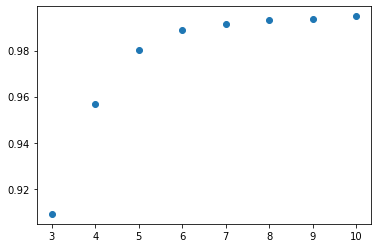

In [30]:
ev_per_arc = []
for i in range(3,11):
    XC, S, C, SSE, varexpl = PCHA(data_pca, noc=i, delta=0.1)
    ev_per_arc.append(varexpl)
    # print(varexpl)
plt.scatter(x = [3,4,5,6,7,8,9,10], y = ev_per_arc)

In [42]:
data_pca.shape

(225, 20)

In [43]:
data_pca = pd.DataFrame(data_pca, index=data.index)

In [45]:
data_pca.to_csv("../../data/single-cell-rna-seq/PNECs/magic_pca.csv")

In [47]:
data.to_csv('../../data/single-cell-rna-seq/PNECs/log_data.csv')

# Lung epithelium

In [14]:
epi = pd.read_csv('../../data/single-cell-rna-seq/PNECs/GSE102580_filtered_normalized_counts_human.tsv', delimiter='\t', index_col = 0)

In [15]:
epi

,0,1,2,3,4,5,6,7,8,9,...,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969
A1BG,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0
A1BG-AS1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0
A1CF,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0
A2M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0
A2M-AS1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.69373,0.000000,0.0,0.000000,0.000000,0.0
ZYG11B,0.440496,0.000000,0.000000,0.0,3.414045,0.0,0.0,1.532842,1.574395,0.0,...,0.0,0.0,0.000000,0.689717,0.00000,0.787745,0.0,0.907221,0.914055,0.0
ZYX,0.440496,1.776184,0.902762,0.0,1.138015,0.0,0.0,0.000000,3.148790,0.0,...,0.0,0.0,2.558392,0.000000,0.69373,3.150980,0.0,1.814443,0.000000,0.0
ZZEF1,0.000000,0.000000,0.000000,0.0,1.138015,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0


In [19]:
epi_meta = pd.read_csv('../../data/single-cell-rna-seq/PNECs/GSE102580_meta_filtered_counts_human.tsv', delimiter='\t', index_col=0, header = None)

In [20]:
epi_meta

,1,2,3,4,5,6,7,8
0,,,,,,,,
0,donor1.counts.tsv.gz,bcEJUM,donor1,16446,0.159309,831.464201,-615.646984,Interm. secr.>cil.
1,donor1.counts.tsv.gz,bcCETZ,donor1,12179,0.121110,446.097284,-285.046810,Basal
2,donor1.counts.tsv.gz,bcCFYR,donor1,7993,0.157763,854.891144,-759.815134,Ciliated
3,donor1.counts.tsv.gz,bcCYRU,donor1,5499,0.228587,754.300791,-743.606481,SLC16A7+
4,donor1.counts.tsv.gz,bcETWG,donor1,6451,0.138118,819.402133,-543.914836,Interm. secr.>cil.
...,...,...,...,...,...,...,...,...
2965,donor3.counts.tsv.gz,bcEPHI,donor3,9345,0.170787,485.482609,-248.934533,Basal
2966,donor3.counts.tsv.gz,bcDJHI,donor3,9823,0.109742,877.488805,-360.160502,Secretory
2967,donor3.counts.tsv.gz,bcCJMG,donor3,8409,0.227851,725.578190,-333.334711,Interm. basal>secr.


In [21]:
epi_meta[8].value_counts()

Interm. basal>secr.    1812
Secretory               280
Ciliated                258
Basal                   252
Interm. secr.>cil.      202
Brush+PNEC               56
Ionocytes                45
SLC16A7+                 43
FOXN4+                   22
Name: 8, dtype: int64

In [26]:
pnecs = epi[epi_meta.loc[epi_meta[8] == 'Brush+PNEC'].index.astype(str)]

In [30]:
pnecs = np.log1p(pnecs)

In [32]:
# import pandas as pd
magic_operator = magic.MAGIC(solver='approximate')
X_magic = magic_operator.fit_transform(pnecs.T)

Calculating MAGIC...
  Running MAGIC on 56 cells and 25475 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/magic/magic.py:426: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "
/Users/smgroves/.local/lib/python3.7/site-packages/graphtools/base.py:168: RuntimeWarning: Cannot perform PCA to 100 dimensions on data with min(n_samples, n_features) = 56
  RuntimeWarning,


    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 0.22 seconds.
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 0.29 seconds.


In [33]:
pca = PCA(n_components=20)
data_pca = pca.fit_transform(X_magic)

In [34]:
data_pca.shape

(56, 20)

In [37]:
data_pca = pd.DataFrame(data_pca, index=pnecs.columns)

In [38]:
data_pca.to_csv("../../data/single-cell-rna-seq/PNECs/magic_pca_plasschaert.csv")

In [39]:
pnecs.to_csv('../../data/single-cell-rna-seq/PNECs/log_data_plasschaert.csv')